# **STUDENT DEPRESSION ANALYSIS AND PREDICTION**

In [1]:
path = r"C:\Users\user\Desktop\Projects\Student Depression\student_depression_dataset.csv"

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from ydata_profiling import ProfileReport

In [3]:
df = pd.read_csv(path)
df.head()

id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3          '7-8 hours'       Moderate      BCA   
4          '5-6 hours'       Moderate   M.Tech   

  Have you ever had suicidal thoughts ?  Work/Study Hours Financial Stress  \
0                                   Yes               3.0              1.0   
1                                    No               3.0              2.0   
2                                    No               9.0              1.0   
3                                   Yes               4.0              5.0   
4                                   Yes               1.0              1.0   

  Family History of Mental Illness  Depression  
0                               No           1  
1                              Yes           0  
2                              Yes           0  
3                              Yes           1  
4                               No           0

In [4]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.strip()

In [6]:
df = df.rename(columns = {'have_you_ever_had_suicidal_thoughts_?':'suicidal', 'family_history_of_mental_illness':'family_history'})

In [7]:
df.columns

Index(['id', 'gender', 'age', 'city', 'profession', 'academic_pressure',
       'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction',
       'sleep_duration', 'dietary_habits', 'degree', 'suicidal',
       'work/study_hours', 'financial_stress', 'family_history', 'depression'],
      dtype='object')

In [8]:
df.duplicated().any()

False

In [9]:
df.isna().any()

id                    False
gender                False
age                   False
city                  False
profession            False
academic_pressure     False
work_pressure         False
cgpa                  False
study_satisfaction    False
job_satisfaction      False
sleep_duration        False
dietary_habits        False
degree                False
suicidal              False
work/study_hours      False
financial_stress      False
family_history        False
depression            False
dtype: bool

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  27901 non-null  int64  
 1   gender              27901 non-null  object 
 2   age                 27901 non-null  float64
 3   city                27901 non-null  object 
 4   profession          27901 non-null  object 
 5   academic_pressure   27901 non-null  float64
 6   work_pressure       27901 non-null  float64
 7   cgpa                27901 non-null  float64
 8   study_satisfaction  27901 non-null  float64
 9   job_satisfaction    27901 non-null  float64
 10  sleep_duration      27901 non-null  object 
 11  dietary_habits      27901 non-null  object 
 12  degree              27901 non-null  object 
 13  suicidal            27901 non-null  object 
 14  work/study_hours    27901 non-null  float64
 15  financial_stress    27901 non-null  object 
 16  fami

In [11]:
df.nunique()

id                    27901
gender                    2
age                      34
city                     52
profession               14
academic_pressure         6
work_pressure             3
cgpa                    332
study_satisfaction        6
job_satisfaction          5
sleep_duration            5
dietary_habits            4
degree                   28
suicidal                  2
work/study_hours         13
financial_stress          6
family_history            2
depression                2
dtype: int64

In [12]:
df['depression'] = df['depression'].apply(lambda x: "Yes" if x == 1 else "No")

In [13]:
df.depression.value_counts()

depression
Yes    16336
No     11565
Name: count, dtype: int64

In [14]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
df.describe().T

count          mean           std   min       25%  \
id                  27901.0  70442.149421  40641.175216   2.0  35039.00   
age                 27901.0     25.822300      4.905687  18.0     21.00   
academic_pressure   27901.0      3.141214      1.381465   0.0      2.00   
work_pressure       27901.0      0.000430      0.043992   0.0      0.00   
cgpa                27901.0      7.656104      1.470707   0.0      6.29   
study_satisfaction  27901.0      2.943837      1.361148   0.0      2.00   
job_satisfaction    27901.0      0.000681      0.044394   0.0      0.00   
work/study_hours    27901.0      7.156984      3.707642   0.0      4.00   

                         50%        75%       max  
id                  70684.00  105818.00  140699.0  
age                    25.00      30.00      59.0  
academic_pressure       3.00       4.00       5.0  
work_pressure           0.00       0.00       5.0  
cgpa                    7.77       8.92      10.0  
study_satisfaction      3.00       4.00       5.0  
job_satisfaction        0.00       0.00       4.0  
work/study_hours        8.00      10.00      12.0

In [35]:
depressed_student_count = df['depression'].value_counts(ascending =False).reset_index()
depressed_student_count

depression  count
0        Yes  16336
1         No  11565

Text(0, 0.5, 'Depressed Students')

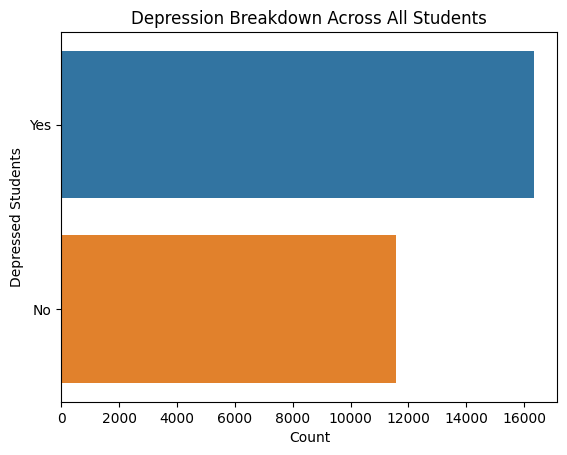

In [36]:
sns.barplot(depressed_student_count, x = 'count', y = 'depression')
plt.title("Depression Breakdown Across All Students")
plt.xlabel("Count")
plt.ylabel("Depressed Students")

### **Depression Prevalence Among Individuals**

The dataset reveals the distribution of individuals experiencing depression.

#### **Key Observations**
- **16,336 individuals (58.55%) reported being depressed,** indicating a high prevalence of mental health struggles.  
- **11,565 individuals (41.45%) did not report depression,** showing that a significant portion of the population remains unaffected.  
- The high number of depression cases suggests **an urgent need for mental health awareness, preventive measures, and accessible support systems.**  


In [44]:
## depression individuals 
depressed_students = df[df['depression']=='Yes'].reset_index(drop = True)

In [17]:
%matplotlib inline

## **Statistical Summary**

In [37]:
## Descriptive stats for depressed Students
depressed_students.select_dtypes(include =['number']).describe().T

count          mean           std   min       25%  \
id                  16336.0  70473.715536  40702.402805   2.0  34879.25   
age                 16336.0     24.887733      4.658028  18.0     21.00   
academic_pressure   16336.0      3.693132      1.188834   0.0      3.00   
work_pressure       16336.0      0.000306      0.039120   0.0      0.00   
cgpa                16336.0      7.683588      1.454715   0.0      6.37   
study_satisfaction  16336.0      2.751469      1.351958   0.0      2.00   
job_satisfaction    16336.0      0.000551      0.039117   0.0      0.00   
work/study_hours    16336.0      7.807603      3.450328   0.0      6.00   

                         50%        75%       max  
id                  70873.50  105964.00  140699.0  
age                    24.00      28.00      48.0  
academic_pressure       4.00       5.00       5.0  
work_pressure           0.00       0.00       5.0  
cgpa                    7.85       8.91      10.0  
study_satisfaction      3.00       4.00       5.0  
job_satisfaction        0.00       0.00       4.0  
work/study_hours        9.00      11.00      12.0

In [42]:
## Correlation Analysis Across the Depressed Students
correlation_analysis = depressed_students[['age', 'academic_pressure', 'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction', 'work/study_hours']].corr().round(2)

correlation_analysis

age  academic_pressure  work_pressure  cgpa  \
age                 1.00               0.02          -0.01  0.02   
academic_pressure   0.02               1.00          -0.02 -0.03   
work_pressure      -0.01              -0.02           1.00 -0.04   
cgpa                0.02              -0.03          -0.04  1.00   
study_satisfaction -0.05              -0.09          -0.02 -0.04   
job_satisfaction   -0.01              -0.03           0.80 -0.05   
work/study_hours    0.01              -0.00           0.00 -0.01   

                    study_satisfaction  job_satisfaction  work/study_hours  
age                              -0.05             -0.01              0.01  
academic_pressure                -0.09             -0.03             -0.00  
work_pressure                    -0.02              0.80              0.00  
cgpa                             -0.04             -0.05             -0.01  
study_satisfaction                1.00             -0.02              0.00  
job_satisfaction                 -0.02              1.00              0.00  
work/study_hours                  0.00              0.00              1.00

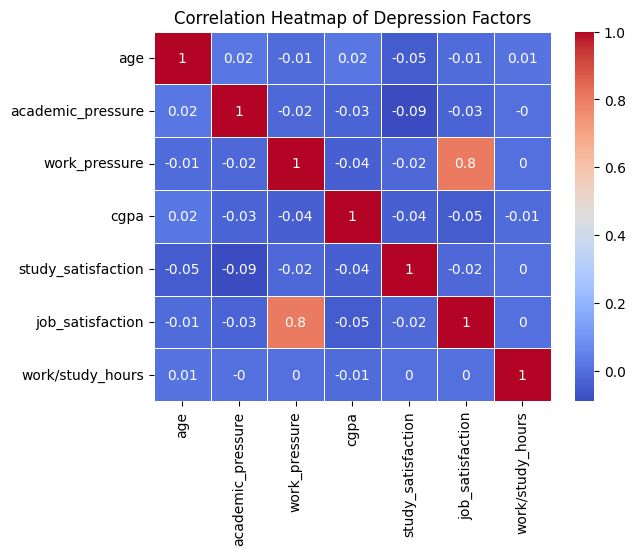

In [43]:
sns.heatmap(correlation_analysis, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Depression Factors")
plt.show()

### **Correlation Analysis of Depressed Students**

This correlation matrix explores the relationships between various factors affecting depression among students.

#### **Key Observations**
1. **Work Pressure and Job Satisfaction are Strongly Correlated (0.80)**  
   - A high correlation suggests that **students facing high work pressure tend to have lower job satisfaction.**  
   - This could indicate **burnout, stress, and dissatisfaction with work-life bal
     ce.**  

2. **Academic Pressure Shows a Weak Negative Correlation with Study Satisfaction (-0.09)**  
   - This implies that **students under high academic pressure are less satisfied with their studies.**  
   - However, the weak correlation suggests that other factors may influence study sa
     sfaction.  

3. **CGPA Has a Weak Negative Correlation with Study Satisfaction (-0.04)**  
   - A higher CGPA does not necessarily lead to higher study satisfaction.  
   - This might indicate that **students achieving high grades still struggle with stress, workload, or external exp
ectations.**  

4. **Age Has Minimal Correlation with Other Factors**  
   - Age does not seem to significantly influence **academic/work pressure, satisfaction levels, or CGPA.**  
   - This suggests that **mental health challenges affect students similarly across differe
nt age groups.**  

5. **Work/Study Hours Have No Significant Impact on Any Factor**  
   - The correlation values (~0.00) indicate that the number of hours spent studying or working does not have a strong relationship with depression-related factors.  


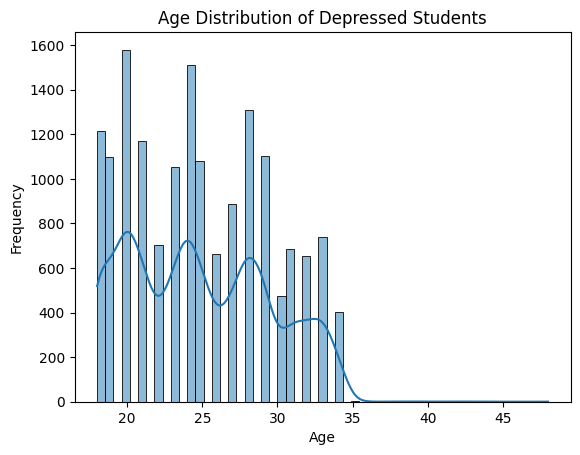

In [19]:
## Age Distribution of Drepresed Students 
sns.histplot(depressed_students, x = 'age', kde = True)
plt.title("Age Distribution of Depressed Students")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### **Age Distribution of Depressed Students**

The histogram shows the distribution of depression cases across different age groups.

#### **Key Observations**
- **Peak Age Range:** Depression cases are most frequent between **ages 18 and 30**, with the highest concentration around **20 to 26 years old**.
- **Declining Trend:** The number of depressed students significantly decreases beyond **age 30**, and cases are nearly absent beyond **age 35**.
- **Multiple Peaks:** The KDE (Kernel Density Estimation) curve suggests multiple peaks, indicating that depression prevalence may fluctuate within different subgroups of young adults.
- **Possible Factors:** The high prevalence in younger ages could be linked to **academic pressure, career uncertainty, financial struggles, and social transitions** commonly experienced by university students and early professionals.


## **EXPLORATORY DATA ANALYSIS**

In [47]:
## depreesion across different genders
gender_breakdown = depressed_students.groupby('gender')['depression'].agg('count').reset_index()
gender_breakdown

gender  depression
0  Female        7221
1    Male        9115

Text(0, 0.5, 'Gender')

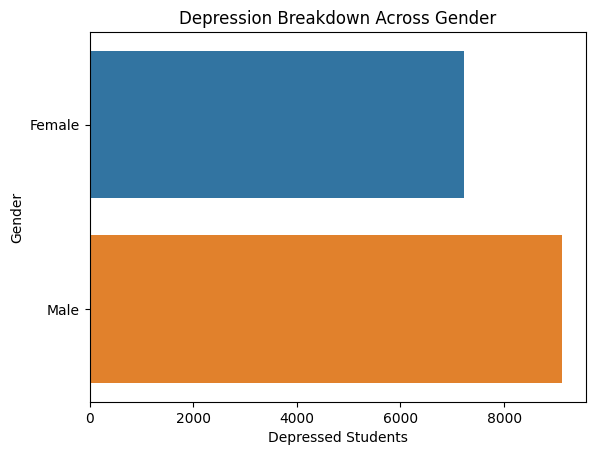

In [46]:
plt.figure()
sns.barplot(gender_breakdown, x = 'depression', y = 'gender')
plt.title("Depression Breakdown Across Gender")
plt.xlabel("Depressed Students")
plt.ylabel("Gender")

### **Depression Breakdown Across Gender**

The dataset provides a breakdown of depression cases by gender:  

- **Male:** 9,115 cases  
- **Female:** 7,221 cases  

#### **Key Insights**
1. Males have a **higher** reported number of depression cases (9,115) compared to females (7,221).
2. This could indicate potential gender-based differences in mental health experiences, reporting behavior, or societal pressures.
3. Further analysis could explore **factors influencing these differences**, such as stress levels, support systems, or stigma associated with mental health in different genders.


In [20]:
## Cities with depressed student 
top_depressed_cities = depressed_students['city'].value_counts().sort_values(ascending = False).reset_index().head(5)
top_depressed_cities

city  count
0       Kalyan    934
1    Hyderabad    897
2     Srinagar    763
3  Vasai-Virar    739
4        Thane    673

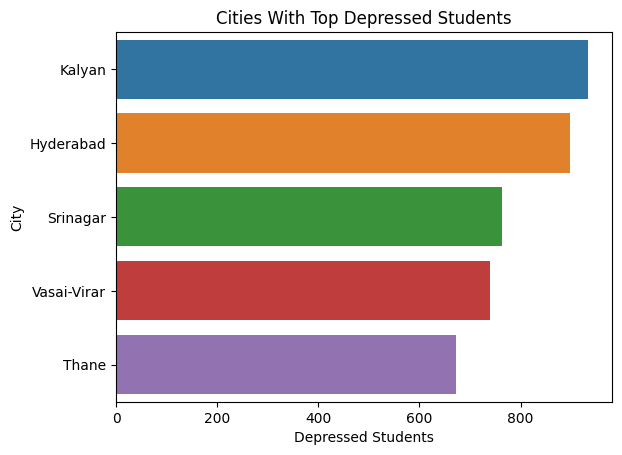

In [21]:
sns.barplot(top_depressed_cities, x = 'count', y = 'city')
plt.title('Cities With Top Depressed Students')
plt.xlabel("Depressed Students")
plt.ylabel("City")
plt.show()

### **Top 5 Cities with the Highest Number of Depressed Students**

The dataset highlights the **top 5 cities** with the highest number of reported depression cases among students.

#### **Key Observations**
- **Kalyan** has the highest number of depressed students, with **934 cases**.
- **Hyderabad** follows closely with **897 cases**, indicating a significant mental health burden in the city.
- **Srinagar** and **Vasai-Virar** also report high numbers, with **763 and 739 cases**, respectively.
- **Thane** has comparatively fewer reported cases (**67 cases**), but it still ranks among the top 5 cities.


In [22]:
## Depression Across diferrent professions 
profession_breakdown = depressed_students['profession'].value_counts().reset_index().head(5)
profession_breakdown

profession  count
0             Student  16308
1           Architect      7
2             Teacher      5
3  'Digital Marketer'      2
4    'Content Writer'      2

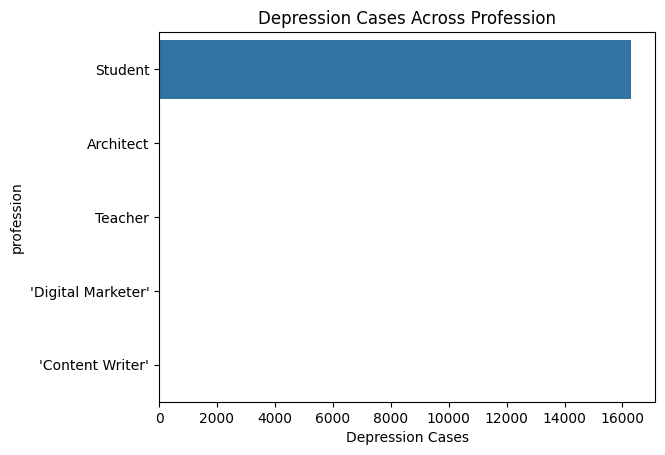

In [23]:
sns.barplot(profession_breakdown, x = 'count', y = 'profession')
plt.title("Depression Cases Across Profession")
plt.xlabel("Depression Cases")
plt.ylabel("profession")
plt.show()

### **Depression Cases by Profession**

The dataset highlights the number of reported depression cases across different professions.

#### **Key Observations**
- **Students** make up the overwhelming majority, with **16,308 cases**, suggesting that **academic pressure, career uncertainty, and social stressors** are major contributors to mental health struggles.
- **Architects (7 cases), Teachers (5 cases), Digital Marketers (2 cases), and Content Writers (2 cases)** report significantly fewer cases.  
- The stark contrast between students and working professionals may indicate **underreporting among professionals** or that students face a unique set of challenges leading to higher depression rates.


In [24]:
## Depression Across diferrent sleeping durations 
sleep_duration_breakdown = depressed_students['sleep_duration'].value_counts().reset_index().head(5)
sleep_duration_breakdown

sleep_duration  count
0  'Less than 5 hours'   5361
1          '7-8 hours'   4371
2          '5-6 hours'   3517
3  'More than 8 hours'   3078
4               Others      9

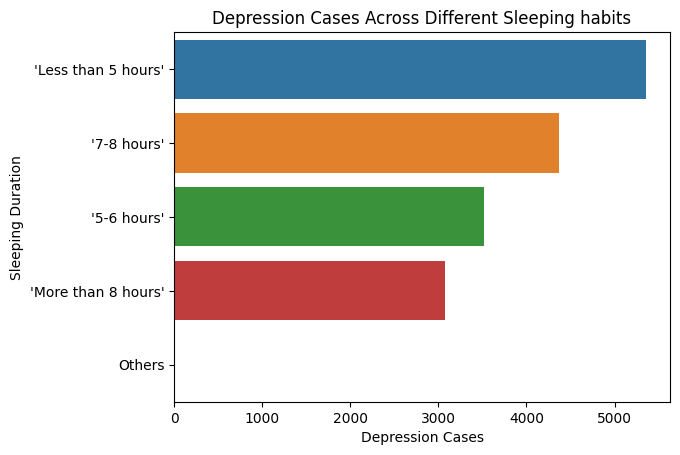

In [25]:
sns.barplot(sleep_duration_breakdown, x = 'count', y = 'sleep_duration')
plt.title("Depression Cases Across Different Sleeping habits")
plt.xlabel("Depression Cases")
plt.ylabel("Sleeping Duration")
plt.show()

### **Impact of Sleep Duration on Depression Cases**

The dataset highlights the distribution of depression cases based on sleep duration.

#### **Key Observations**
- **The highest number of depressed individuals (5,361 cases) sleep less than 5 hours**, suggesting that **lack of sleep is strongly associated with depression.**  
- **Those sleeping 7-8 hours (4,371 cases)** show a lower count, which aligns with the recommended healthy sleep duration.  
- **People sleeping 5-6 hours (3,517 cases)** still have a significant number of depression cases, indicating partial sleep deprivation as a potential risk factor.  
- **Individuals sleeping more than 8 hours (3,078 cases)** also report high depression cases, which might suggest an association between excessive sleep and poor mental health.  
- **"Others" (9 cases)** could include inconsistent or highly irregular sleep patterns.


In [26]:
## Depression Across diferrent dietary habits 
dietary_habits_breakdown = depressed_students['dietary_habits'].value_counts().reset_index().head(5)
dietary_habits_breakdown

dietary_habits  count
0      Unhealthy   7297
1       Moderate   5558
2        Healthy   3473
3         Others      8

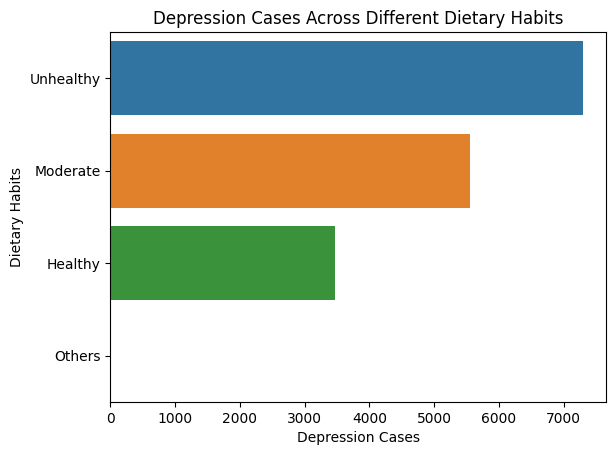

In [27]:
sns.barplot(dietary_habits_breakdown, x = 'count', y = 'dietary_habits')
plt.title("Depression Cases Across Different Dietary Habits")
plt.xlabel("Depression Cases")
plt.ylabel("Dietary Habits")
plt.show()

### **Impact of Dietary Habits on Depression Cases**

The dataset highlights the relationship between dietary habits and depression cases.

#### **Key Observations**
- **Unhealthy dietary habits are the most common among depressed individuals (7,297 cases),** suggesting a strong link between poor nutrition and mental health struggles.  
- **Individuals with a moderate diet (5,558 cases)** also report high depression cases, indicating that partial imbalances in nutrition may still contribute to mental distress.  
- **Those following a healthy diet (3,473 cases) report the lowest number of depression cases**, supporting the idea that balanced nutrition plays a role in mental well-being.  
- **"Others" (8 cases)** may represent individuals with highly irregular or extreme eating patterns.


In [28]:
## Depression Across diferrent Academic Qualifications
degree_breakdown = depressed_students['degree'].value_counts().reset_index().head(5)
degree_breakdown

degree  count
0  'Class 12'   4303
1        B.Ed   1021
2      B.Arch    871
3       B.Com    853
4         BCA    819

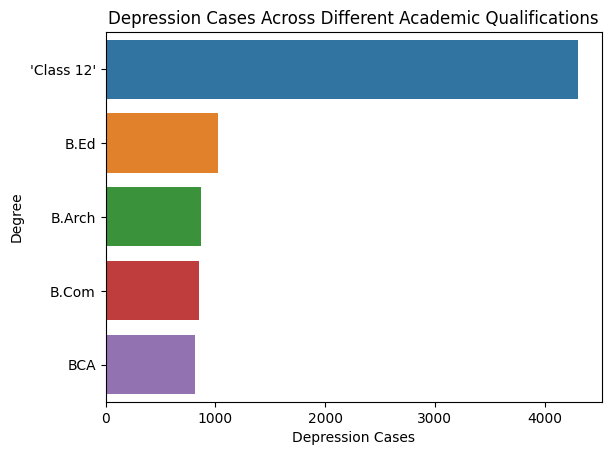

In [29]:
sns.barplot(degree_breakdown, x = 'count', y = 'degree')
plt.title("Depression Cases Across Different Academic Qualifications")
plt.xlabel("Depression Cases")
plt.ylabel("Degree")
plt.show()

### **Depression Cases by Educational Qualification**

The dataset highlights the number of depression cases based on different educational qualifications.

#### **Key Observations**
- **Students in Class 12 (4,303 cases) report the highest depression cases**, likely due to **academic pressure, university entrance exams, and career uncertainty.**  
- **B.Ed (1,021 cases)**, a degree for future educators, also shows a significant number of cases, possibly due to the **stress of teaching methodologies, job prospects, and training workload.**  
- **B.Arch (871 cases)** students experience substantial depression cases, which could be linked to the **intensive coursework, design critiques, and demanding projects.**  
- **B.Com (853 cases) and BCA (819 cases)** also report notable numbers, indicating that commerce and computer application students may face **stress related to competition, internships, and career prospects.**  


In [30]:
## Depression Across diferrent suicidal habits
suicidal_habit_breakdown = depressed_students['suicidal'].value_counts().reset_index().head(5)
suicidal_habit_breakdown

suicidal  count
0      Yes  13957
1       No   2379

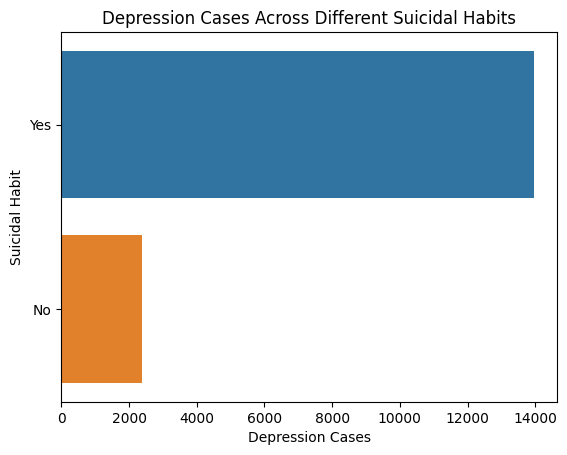

In [32]:
sns.barplot(suicidal_habit_breakdown, x = 'count', y = 'suicidal')
plt.title("Depression Cases Across Different Suicidal Habits")
plt.xlabel("Depression Cases")
plt.ylabel("Suicidal Habit")
plt.show()

### **Suicidal Tendencies Among Depressed Individuals**

The dataset reveals the distribution of suicidal tendencies among individuals experiencing depression.

#### **Key Observations**
- **A staggering 13,957 individuals reported having suicidal tendencies**, accounting for a significant majority of depression cases.  
- **Only 2,379 individuals reported not having suicidal thoughts**, indicating that **suicidal ideation is alarmingly high among depressed individuals.**  
- This suggests an **urgent need for mental health interventions, support systems, and crisis prevention strategies.**  


In [33]:
## Depression Across diferrent suicidal habits
family_history_breakdown = depressed_students['family_history'].value_counts().reset_index().head(5)
family_history_breakdown

family_history  count
0            Yes   8273
1             No   8063

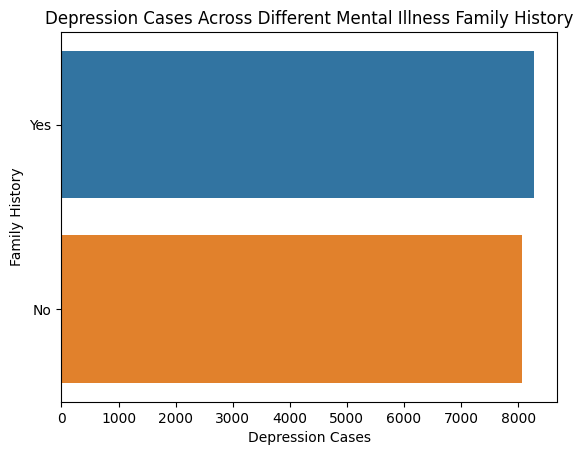

In [34]:
sns.barplot(family_history_breakdown, x = 'count', y = 'family_history')
plt.title("Depression Cases Across Different Mental Illness Family History")
plt.xlabel("Depression Cases")
plt.ylabel("Family History")
plt.show()

### **Impact of Family History on Depression Cases**

The dataset explores the influence of family history on depression.

#### **Key Observations**
- **8,273 individuals with depression have a family history of mental health issues**, suggesting a possible **genetic or environmental link** to depression.  
- **8,063 individuals reported no family history of mental illness**, indicating that depression can also arise due to external factors such as **stress, trauma, and lifestyle choices.**  
- The difference between the two groups is relatively small, implying that **both genetic predisposition and environmental factors play significant roles in depression.**  


## **Conclusion**
### **Major Findings**
- Depression prevalence is high, affecting **more than half** of individuals.
- **Males report higher depression rates**, but gender-based stigma may affect reporting.
- **Work pressure negatively impacts job satisfaction**, leading to mental health struggles.
- **Young adults (18-30 years old) are the most vulnerable group.**
- **Students experience the highest depression rates**, highlighting the need for intervention in educational settings.
- **Poor sleep and unhealthy diets significantly correlate with depression.**
- **Suicidal tendencies among depressed individuals are alarmingly high.**
- **Family history plays a role, but external factors are equally significant.**

### **Call to Action**
- **Strengthen mental health awareness programs.**
- **Enhance psychological support in schools and workplaces.**
- **Encourage healthy lifestyle choices to prevent mental distress.**
- **Develop targeted suicide prevention strategies.**